In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/stud.csv')

In [67]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average                      1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


In [69]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
average                        0
dtype: int64

In [70]:
df.duplicated().sum()

np.int64(0)

In [71]:
round(df.describe(),2)

,math_score,reading_score,writing_score,total_score,average
count,1000.00,1000.00,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05,203.31,67.77
std,15.16,14.60,15.20,42.77,14.26
min,0.00,17.00,10.00,27.00,9.00
25%,57.00,59.00,57.75,175.00,58.33
50%,66.00,70.00,69.00,205.00,68.33
75%,77.00,79.00,79.00,233.00,77.67
max,100.00,100.00,100.00,300.00,100.00


In [72]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

In [73]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

print(f'There are {len(numeric_features)} numeric Features. The features are: {numeric_features}')
print(f'There are {len(categorical_features)} categorical Features. The features are: {categorical_features}')

There are 5 numeric Features. The features are: ['math_score', 'reading_score', 'writing_score', 'total_score', 'average']
There are 5 categorical Features. The features are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [74]:
# Create a column 'total_score' and 'average'
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3

In [75]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [76]:
df[df['reading_score'] == 100]['average'].count()

np.int64(17)

In [77]:
# Students with full marks and failure marks

read_full_marks = df[(df['reading_score'] == 100)]['average'].count()
read_fail_marks = df[(df['reading_score'] < 30)]['average'].count()
print(f'Number of students with full marks in reading: {read_full_marks}')
print(f'Number of students with failure marks in reading: {read_fail_marks} \n')

math_full_marks = df[(df['math_score'] == 100)]['average'].count()
math_fail_marks = df[(df['math_score'] < 30)]['average'].count()
print(f'Number of students with full marks in math: {math_full_marks}')
print(f'Number of students with failure marks in math: {math_fail_marks} \n')

writing_full_marks = df[(df['writing_score'] == 100)]['average'].count()
writing_fail_marks = df[(df['writing_score'] < 30)]['average'].count()
print(f'Number of students with full marks in math: {writing_full_marks}')
print(f'Number of students with failure marks in math: {writing_fail_marks}')

Number of students with full marks in reading: 17
Number of students with failure marks in reading: 8 

Number of students with full marks in math: 7
Number of students with failure marks in math: 14 

Number of students with full marks in math: 14
Number of students with failure marks in math: 9


<Axes: xlabel='total_score', ylabel='Density'>

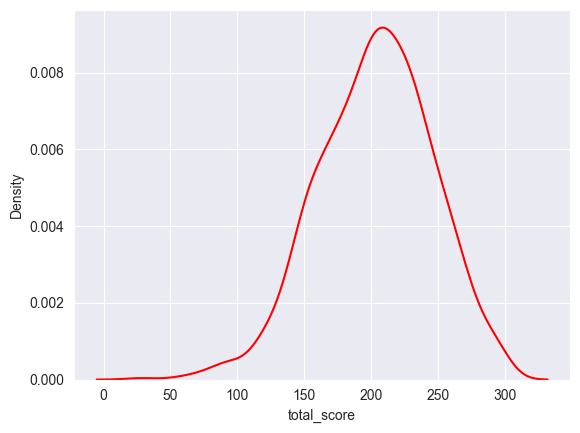

In [78]:
sns.kdeplot(df['total_score'], color='red')

<Axes: xlabel='total_score', ylabel='Count'>

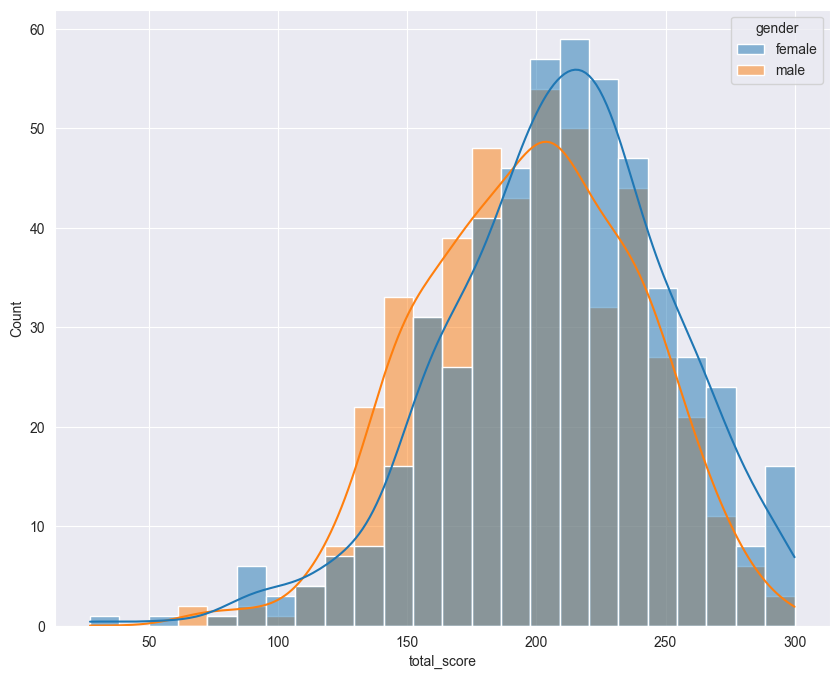

In [79]:
plt.subplots(figsize=(10,8))
sns.histplot(df, x='total_score', hue='gender', kde=True)

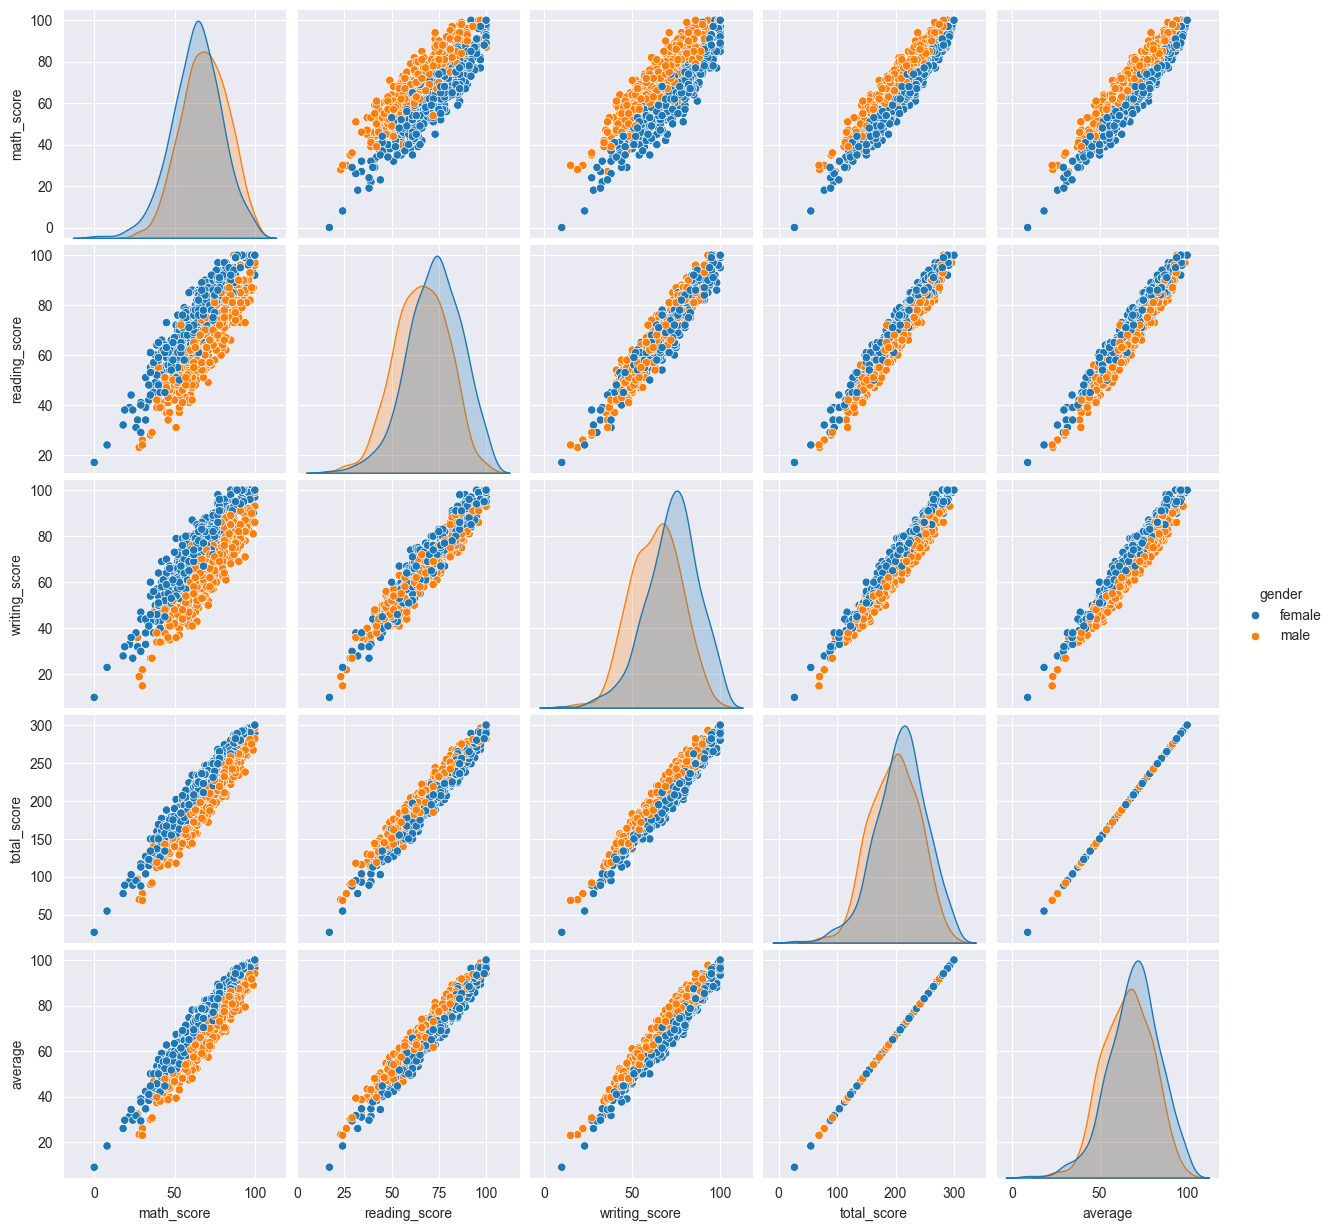

In [53]:
sns.pairplot(df, hue='gender')
plt.show()

In [85]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


<Axes: xlabel='total_score'>

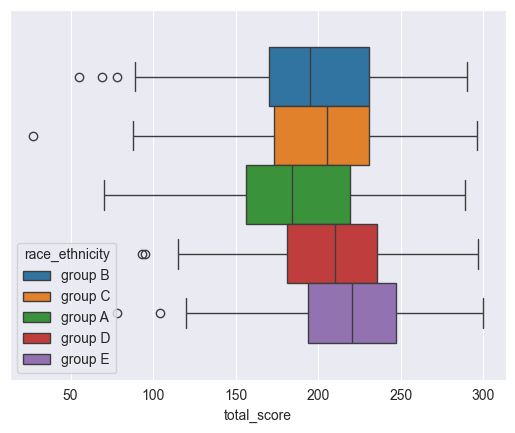

In [91]:
sns.boxplot(df, x='total_score', hue='race_ethnicity')

### INSIGHT: FEMALE STUDENTS HAVE HIGHER SCORES THAN MALE STUDENTS